In [1]:

#######################################################################

#======================================================================
#IMPORT LIBRARIES
#======================================================================


from tensorflow.keras.layers import Input,  Dense, Flatten,Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.callbacks import EarlyStopping


import PIL
import cv2

from sklearn.model_selection import train_test_split

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

import os




#######################################################################



In [2]:
print(os.getcwd())

/content


In [8]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
os.chdir('/content/drive/MyDrive/image/sample')

In [10]:

#======================================================================
#SET DIRECTORY
#======================================================================


cwd = os.getcwd()
train_path='train'

val_path='val'

test_path='test'

IMAGE_SIZE = [224, 224]

#######################################################################


In [11]:
print(os.getcwd())

/content/drive/MyDrive/image/sample


In [14]:
#======================================================================
#IMPORT DATA
#======================================================================

x_train=[]

x_val=[]

x_test=[]


sub_path_train=cwd+"/"+train_path
sub_path_val=cwd+"/"+val_path
sub_path_test=cwd+"/"+test_path

 

#    print(sub_path)
#    if 'flower' in folder:
#        print(1)
#    elif 'animal' in folder:
#        print(2)
#    os.listdir(sub_path)

for folder in os.listdir(sub_path_train):
    
    sub_path=sub_path_train+"/"+folder
    
    for img in os.listdir(sub_path):
    
        image_path=sub_path+"/"+img
        
        #print(image_path)

        img_arr=cv2.imread(image_path)

        img_arr=cv2.resize(img_arr,(224,224))

        x_train.append(img_arr)
    

    
for folder in os.listdir(sub_path_val):
    
    sub_path=sub_path_val+"/"+folder
    
    for img in os.listdir(sub_path):
    
        image_path=sub_path+"/"+img
        
        #print(image_path)

        img_arr=cv2.imread(image_path)

        img_arr=cv2.resize(img_arr,(224,224))

        x_val.append(img_arr)
    
    

    
for folder in os.listdir(sub_path_test):
    
    sub_path=sub_path_test+"/"+folder
    
    for img in os.listdir(sub_path):
    
        image_path=sub_path+"/"+img
        
        #print(image_path)

        img_arr=cv2.imread(image_path)

        img_arr=cv2.resize(img_arr,(224,224))

        x_test.append(img_arr)
        
        


Found 69 images belonging to 2 classes.
Found 17 images belonging to 3 classes.
Found 4 images belonging to 3 classes.
80150528/80134624 [==============================] - 0s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_c

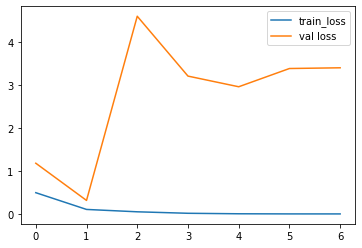

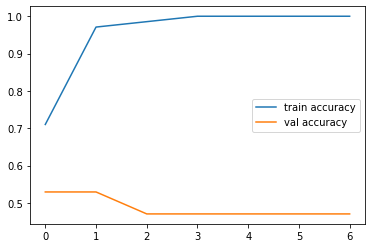

1/1 [==============================] - 2s 2s/step - loss: 0.5071 - accuracy: 0.0000e+00
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       2.0
           1       0.00      0.00      0.00       2.0
           2       0.00      0.00      0.00       0.0

    accuracy                           0.00       4.0
   macro avg       0.00      0.00      0.00       4.0
weighted avg       0.00      0.00      0.00       4.0



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1

array([[0, 2, 0],
       [0, 0, 2],
       [0, 0, 0]])

In [15]:

#Generate Train and Test Split

X_train_arr = np.array(x_train)
X_val_arr = np.array(x_val)
X_test_arr = np.array(x_test)


X_train_arr = X_train_arr/255.0
X_val_arr = X_val_arr/255.0
X_test_arr = X_test_arr/255.0



Y_train_datagen = ImageDataGenerator(rescale = 1./255)
Y_val_datagen = ImageDataGenerator(rescale = 1./255)
Y_test_datagen = ImageDataGenerator(rescale = 1./255)


training_set = Y_train_datagen.flow_from_directory(sub_path_train,
                                                 target_size = (224, 224),
                                                 batch_size = 2,
                                                 class_mode = 'sparse')
val_set = Y_val_datagen.flow_from_directory(sub_path_val,
                                                 target_size = (224, 224),
                                                 batch_size = 2,
                                                 class_mode = 'sparse')
test_set = Y_test_datagen.flow_from_directory(sub_path_test,
                                                 target_size = (224, 224),
                                                 batch_size = 2,
                                                 class_mode = 'sparse')


training_set.class_indices
val_set.class_indices
test_set.class_indices

train_y=training_set.classes
val_y=val_set.classes
test_y=test_set.classes


##############################################################################

#Import VGG-19 Model trained on imagenet

vgg = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

#do not train the pre-trained layers of VGG-19
for layer in vgg.layers:
    layer.trainable = False


a = Flatten()(vgg.output)

pred = Dense(1, activation='sigmoid')(a)

model = Model(inputs=vgg.input, outputs=pred)

model.summary()

model.compile(
    optimizer = 'adam', 
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)

#Alternate compilation

'''
model.compile(
  loss='sparse_categorical_crossentropy',
  optimizer="adam",
  metrics=['accuracy']
)
'''

early_stop=EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=5)

customModel = model.fit(
  X_train_arr,
  train_y,
  validation_data=(X_val_arr,val_y),
  epochs=10,
  callbacks=[early_stop],
  batch_size=4,shuffle=True)


plt.plot(customModel.history['loss'],label = 'train_loss')
plt.plot(customModel.history['val_loss'], label='val loss')
plt.legend()
plt.show()

plt.plot(customModel.history['accuracy'],label = 'train accuracy')
plt.plot(customModel.history['val_accuracy'],label = 'val accuracy')
plt.legend()
plt.show()




model.evaluate(X_test_arr,test_y,batch_size=4)


y_pred = model.predict(X_test_arr)

y_pred_arr =[]

for i in y_pred:
    if i < 0.5:
        y_pred_arr.append(0)
    else:
        y_pred_arr.append(1)
        

accuracy_score(y_pred_arr,test_y)


print(classification_report(y_pred_arr,test_y))

confusion_matrix(y_pred_arr,test_y)



For Image -  cody-fitzgerald-lWJeGCgVbYI-unsplash.jpg 

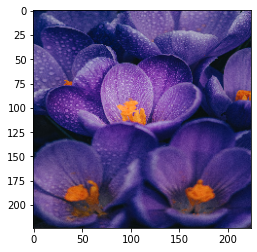

 , Model Prediction is :  [[0.]] , i.e.  Flower
For Image -  zoltan-tasi-PN8Un1ywbE8-unsplash.jpg 

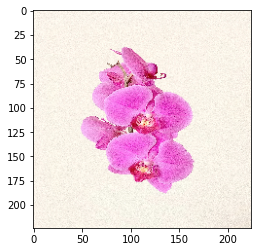

 , Model Prediction is :  [[0.]] , i.e.  Flower
For Image -  rishabh-pandoh--iZV3CqT7LM-unsplash.jpg 

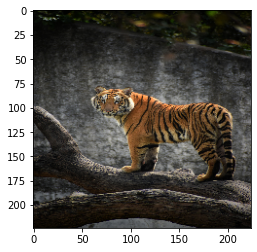

 , Model Prediction is :  [[1.]] , i.e.  Animal
For Image -  alexander-andrews-mEdKuPYJe1I-unsplash.jpg 

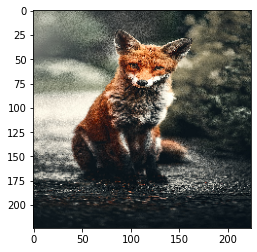

 , Model Prediction is :  [[1.]] , i.e.  Animal
For Image -  photo-1606041008023-472dfb5e530f.jpeg 

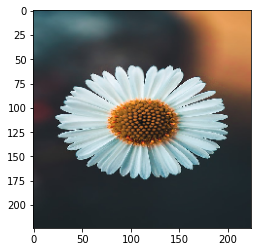

 , Model Prediction is :  [[0.]] , i.e.  Flower
For Image -  WhatsApp Image 2022-05-12 at 3.48.38 PM.jpeg 

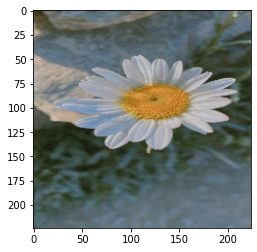

 , Model Prediction is :  [[0.]] , i.e.  Flower


In [17]:

path='/content/drive/MyDrive/image/sampleholdback/check'
for img_pred in os.listdir(path):
    print("For Image - ",img_pred, end = ' ' )
    img_pred=image.load_img(path+'/'+img_pred,target_size=(224,224))
    plt.imshow(img_pred)
    plt.show()
    z=image.img_to_array(img_pred)
    z=np.expand_dims(z,axis=0)
    images=np.vstack([z])
    pred=model.predict(images,batch_size=1) 
    
    print(" , Model Prediction is : ", pred, ", i.e. ", end = ' ' )
    pred
    if pred[0][0]<0.25:
        print("Flower")
    elif pred[0][0]>0.75 and pred[0][0] <1.3:
        print("Animal")
    else:
        print("Unknown")